In [25]:
%reset
%reload_ext autoreload

import numpy as np
import pickle as pk
import matplotlib.pyplot as pl
import matplotlib
from getdist import plots, MCSamples
import scipy.integrate as integrate
import pdb


matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True


%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [26]:
channel = 'Tau'


if (channel == 'Tau'):
    posterior_samp_files = [
        #v01
        #'abc_nrgybin1_smc_adap5_nsamp200_withbgTrue_varyMxFalse_nparam2_tau_default_NE10_MMin1_10yr_run1_batch16_hopefullyfinal.pk',
        #'abc_nrgybin10_smc_adap5_nsamp200_withbgTrue_varyMxFalse_nparam2_tau_default_NE10_MMin1_10yr_run2_batch16_hopefullyfinal.pk'    
        
        #v02
        #'abc_nrgybin1_smc_adap4_nsamp200_withbgTrue_varyMxFalse_nparam2_tau_default_NE10_MMin1_10yr_masked05_run1_nbinssum30_maxiter4_batch4_n301.pk',
        'abc_nrgybin1_smc_adap4_nsamp200_withbgTrue_varyMxFalse_nparam2_tau_default_NE10_MMin1_10yr_masked05_run1_nbinssum30_maxiter4_batch4_n301.pk',
        
        'abc_nrgybin10_smc_adap2_nsamp200_withbgTrue_varyMxFalse_nparam2_tau_default_NE10_MMin1_10yr_masked01_run2_maxiter2_batch16_01.pk'        
            ]
    #likelihood = pk.load(open("../data/exact_likelihoods/likelihood_skymap_tau_default_NE10_MMin1_10yr.pk", 'rb'))
    likelihood = pk.load(open("../data/exact_likelihoods/likelihood_skymap_tau_default_NE10_MMin1_10yr_masked05.pk", 'rb'))
if (channel == 'b'):
    #'abc_nrgybin10_smc_adap4_nsamp400_withbgTrue_varyMxFalse_nparam2_b_default_NE10_MMin1_10yr_run2_batch32_hopefullyfinal_euclid.pk'
    posterior_samp_files = [
        #'abc_nrgybin1_smc_adap5_nsamp400_withbgTrue_varyMxFalse_nparam2_b_default_NE10_MMin1_10yr_run1_batch16_hopefullyfinal.pk',
        'abc_nrgybin1_smc_adap2_nsamp200_withbgTrue_varyMxFalse_nparam2_b_default_NE10_MMin1_10yr_masked01_run1_maxiter2_batch16_01.pk',
        #'abc_nrgybin10_smc_adap4_nsamp200_withbgTrue_varyMxFalse_nparam2_b_default_NE10_MMin1_10yr_run2_batch16_hopefullyfinal_wtf.pk'
        'abc_nrgybin10_smc_adap1_nsamp200_withbgTrue_varyMxFalse_nparam2_b_default_NE10_MMin1_10yr_masked01_run2_maxiter1_batch16_01.pk'
    ]
    #likelihood = pk.load(open("../data/exact_likelihoods/likelihood_skymap_b_default_NE10_MMin1_10yr.pk", 'rb'))
    likelihood = pk.load(open("../data/exact_likelihoods/likelihood_skymap_b_default_NE10_MMin1_10yr_masked01.pk", 'rb'))

    
post_samps = []
for ii in range(0,len(posterior_samp_files)):
    posterior_samples = pk.load(open("../data/ABC_posteriors/" + posterior_samp_files[ii], 'rb'))
    post_samps.append(posterior_samples)


Removed no burn in
Removed no burn in


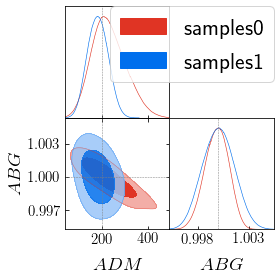

In [27]:
def get_labels(names):
    labels = []
    for ni in names:
        if ni == 'ADM':
            labels.append('ADM')
        if ni == 'bgnorm':
            labels.append('ABG')
        if ni == 'MDM':
            labels.append('MDM')
    return labels

getdist_samps = []
for fi in range(0,len(post_samps)):
    param_min = post_samps[fi]['param_min']
    param_max = post_samps[fi]['param_max']
    param_names = post_samps[fi]['param_names']
    param_true = post_samps[fi]['true_params']
    weights = post_samps[fi]['weights']
    
    # Getdist requires specification of parameter ranges to get accurate contours
    ranges = {}
    markers={} #true parameter values
    for pi in range(0,len(param_min)):
        ranges[param_names[pi]] = [param_min[pi], param_max[pi]]
        markers[param_names[pi]] = param_true[pi]
    
    param_labels = get_labels(param_names)
    getdist_sampfi = MCSamples(samples = post_samps[fi]['samples'], weights = weights,\
                        ranges = ranges, names = param_names,labels = param_labels)    
    getdist_samps.append(getdist_sampfi)

if (1):
    g = plots.get_subplot_plotter()
    g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
    g.settings.axes_fontsize=18
    g.settings.legend_fontsize = 26
    g.settings.axes_labelsize = 22
    g.triangle_plot(getdist_samps, filled=True, markers=markers)

In [28]:
# 1D case
if (0):
    Lnorm = integrate.simps(np.exp(likelihood['lnlike_arr'] - np.max(likelihood['lnlike_arr'])), likelihood['phipp_arr'])
    x = np.linspace(np.min(likelihood['phipp_arr']), np.max(likelihood['phipp_arr']), 1000)
    ABC_norm = integrate.simps(psamps.get1DDensity('PhiPP')(x), x)
    ABC_atsmc_norm = integrate.simps(psamps_atsmc.get1DDensity('PhiPP')(x), x)
    fig, ax = pl.subplots(1,1)
    ax.plot(likelihood['phipp_arr'], np.exp(likelihood['lnlike_arr'] - np.max(likelihood['lnlike_arr']))/Lnorm, label = 'likelihood')
    #hist, bin_edges = np.histogram(posterior_samples[:,0], bins = 50, range = (np.min(likelihood['phipp_arr']), np.max(likelihood['phipp_arr'])))
    #ax.plot(bin_edges[:-1], hist/np.max(hist), label = 'ABC')
    ax.plot(x, psamps.get1DDensity('PhiPP')(x)/ABC_norm, label = 'ABC')
    ax.plot(x, psamps_atsmc.get1DDensity('PhiPP')(x)/ABC_atsmc_norm , label = 'ABC_atsmc')
    ax.plot([1.0, 1.0], [0., 1/Lnorm], ls = 'dashed', color = 'black', label = 'Input PhiPP')
    #ax.set_xscale('log')
    ax.set_xlabel('PhiPP')
    ax.set_ylabel('Likelihood')
    ax.legend()

In [29]:
def get_contour_levels(prob_mat, desired_prob_levels = [0.68, 0.95]):
    #normalize the probability matrix
    prob_mat_normalized = prob_mat/np.sum(prob_mat)
    
    #sort highest to lowest probability
    prob_sort_indices = np.argsort(prob_mat_normalized.flatten())[::-1]
    prob_sorted = prob_mat_normalized.flatten()[prob_sort_indices]
    
    #take cumulative sum of this sorted array - whenever this crosses desired threshold,
    #that will be a contour level
    cumulative_prob = np.cumsum(prob_sorted)
    
    output_levels = np.zeros(len(desired_prob_levels))
    for ci in range(0,len(desired_prob_levels)):
        index = np.min(np.where(cumulative_prob > desired_prob_levels[ci])[0])
        output_levels[ci] = prob_sorted[index]
    return prob_mat_normalized, np.flip(output_levels)


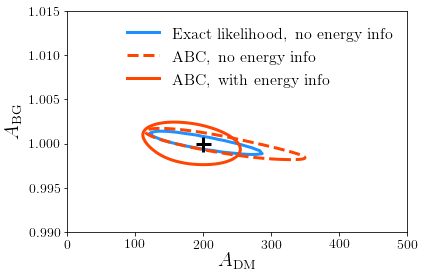

In [30]:
#!!!!!!!
#desired_levels = [0.0, 0.995]
desired_levels = [0.0, 0.68]

fig, ax = pl.subplots(1,1)
lnposterior_exact = likelihood['lnlike_arr']
prob_mat = np.exp(lnposterior_exact - np.max(lnposterior_exact))
prob_mat_normalized, c_levels = get_contour_levels(prob_mat, desired_prob_levels = desired_levels)

color_exact = 'dodgerblue'
color_abc = 'orangered'
color_abc_energy = 'orangered'

ls_exact = 'solid'
ls_abc = 'dashed'
ls_abc_energy = 'solid'

#Has to match order of files
abc_colors = [color_abc, color_abc_energy]
abc_ls = [ls_abc, ls_abc_energy]

if (1):
    #Exact likelihood
    ax.contour(likelihood['ADM_arr'], likelihood['background_norm_arr'], prob_mat_normalized.T, \
                levels = c_levels, linewidths = [3], colors = [color_exact], linestyles = [ls_exact])

if (1):
    #ABC
    for fi in range(0,len(post_samps)):
        param_names = post_samps[fi]['param_names']
        D = getdist_samps[fi].get2DDensity(param_names[0], param_names[1])

        ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
        ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, \
                                                                   desired_prob_levels = desired_levels)
        #print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
        #print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
        ax.contour(D.x, D.y, ABC_prob_mat_normalized.T, \
                    levels = ABC_c_levels, linewidths = [3], colors = [abc_colors[fi]], \
                                                           linestyles = [abc_ls[fi]])

ax.set_ylabel(r'$A_{\rm BG}$', fontsize = 20)    
ax.set_xlabel(r'$A_{\rm DM}$', fontsize = 20)

if (channel == 'Tau'):
    #ax.set_xlim((param_min[0]*2.2, param_max[0]*0.75))
    ax.set_xlim((0., param_max[0]))
    ax.set_ylim((param_min[1], param_max[1]+0.005))
if (channel == 'b'):
    #ax.set_xlim((param_min[0], param_max[0]))
    ax.set_xlim((0., 13.))
    ax.set_ylim((param_min[1], param_max[1]+0.005))

    
#ax.set_ylim((0.95, 1.1))

ax.plot([-1, -1],[-1,-1], lw = 3, color = color_exact, ls = ls_exact, \
                    label = r'$\rm{Exact\,\,likelihood,\,\,no\,\,energy\,\,info}$')
ax.plot([-1, -1],[-1,-1], lw = 3, color = color_abc, ls = ls_abc, \
                    label = r'$\rm{ABC,\,\,no\,\,energy\,\,info}$')
ax.plot([-1, -1],[-1,-1], lw = 3, color = color_abc_energy, ls = ls_abc_energy, \
                    label = r'$\rm{ABC,\,\,with\,\,energy\,\,info}$')

param_true = post_samps[0]['true_params']
ax.plot([param_true[0]], [param_true[1]], marker = '+', color = 'k', markersize = 15, mew=3)

ax.legend(frameon = False, fontsize = 16, loc = 'upper right')
tick_size = 14
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='both', which='minor', labelsize=tick_size)

fig.tight_layout()

#fig.savefig('compare_exactlike_abc_masked_' + channel + '_95.pdf')


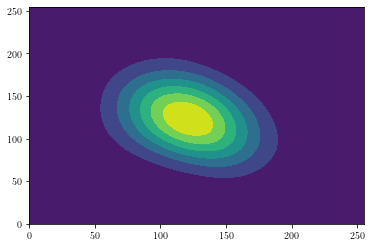

In [87]:
fig, ax = pl.subplots(1 ,1)
ax.contourf(ABC_prob_mat_normalized)

In [77]:
ABC_c_levels

array([6.32674665e-07, 1.16858943e-04])

0.0 7.18186261046774e-05 [4.03748612e-06 7.18186261e-05]
0.0 0.0480815740135822 [0.00259554 0.04808157]
0.0 8.344824512481329e-05 [4.90320653e-06 8.34482451e-05]
0.0 0.0480815740135822 [0.00259554 0.04808157]
0.0 0.0001280518490364947 [9.53348889e-06 1.28051849e-04]
0.0 0.04877279783508845 [0.00227337 0.0487728 ]
0.0 6.117016137239824e-05 [4.79148198e-06 6.11701614e-05]
0.0 0.04877279783508845 [0.00227337 0.0487728 ]


Text(0.5, 1.0, 'ABC Energy Info')

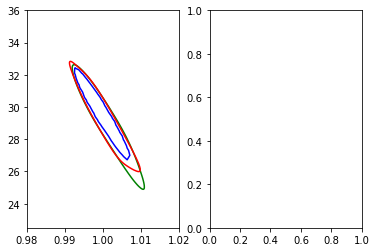

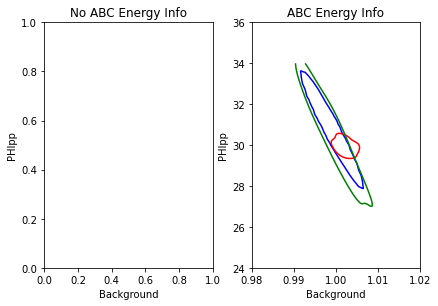

In [9]:

post_load = pk.load(open('./data/exact_likelihoods/likelihood_skymap_for_exactlikelihood_withbgTrue_v01.pk','rb'))
lnposterior = post_load['lnlike_arr']
prob_mat = np.exp(lnposterior - np.max(lnposterior))
prob_mat_normalized, c_levels = get_contour_levels(prob_mat, desired_prob_levels = [0.0, 0.95])
fig,ax = pl.subplots(1,2)
ax[0].contour(post_load['background_norm_arr'], post_load['phipp_arr'], prob_mat_normalized, \
            levels = c_levels, colors= ['blue'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_08.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[0].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['green'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_11.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[0].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['red'])

post_load = pk.load(open('./data/exact_likelihoods/likelihood_skymap_for_exactlikelihood_withbgTrue_v02.pk','rb'))
lnposterior = post_load['lnlike_arr']
prob_mat = np.exp(lnposterior - np.max(lnposterior))
prob_mat_normalized, c_levels = get_contour_levels(prob_mat, desired_prob_levels = [0.0, 0.95])
fig,ax = pl.subplots(1,2)
ax[1].contour(post_load['background_norm_arr'], post_load['phipp_arr'], prob_mat_normalized, \
            levels = c_levels, colors= ['blue'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_withenergy_01.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[1].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['red'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_withenergy_02.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[1].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['green'])

fig.tight_layout()
ax[0].set_ylabel('PHIpp')
ax[0].set_xlabel('Background')
ax[0].set_title('No ABC Energy Info')
ax[1].set_ylabel('PHIpp')
ax[1].set_xlabel('Background')
ax[1].set_title('ABC Energy Info')

In [8]:
param_max

array([300.  ,   1.04])